<a href="https://colab.research.google.com/github/santhalakshminarayana/face-recognition/blob/master/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/Face_Recognition

/content/drive/My Drive/Colab Notebooks/Face_Recognition


In [3]:
path='/content/drive/My Drive/Colab Notebooks/Face_Recognition'

In [4]:
import os
import glob

In [5]:
# Get Image names stored in "Images" folder
image_path_names=[]
person_names=set()
for file_name in glob.glob(path+'/images/*_[1-9]*.jfif'):
  image_path_names.append(file_name)
  person_names.add(image_path_names[-1].split('/')[-1].split('_')[0])

In [6]:
person_names

{'angelamerkel', 'jimping', 'modi'}

In [7]:
image_path_names

['/content/drive/My Drive/Colab Notebooks/Face_Recognition/images/angelamerkel_1.jfif',
 '/content/drive/My Drive/Colab Notebooks/Face_Recognition/images/angelamerkel_4.jfif',
 '/content/drive/My Drive/Colab Notebooks/Face_Recognition/images/angelamerkel_2.jfif',
 '/content/drive/My Drive/Colab Notebooks/Face_Recognition/images/angelamerkel_3.jfif',
 '/content/drive/My Drive/Colab Notebooks/Face_Recognition/images/angelamerkel_5.jfif',
 '/content/drive/My Drive/Colab Notebooks/Face_Recognition/images/angelamerkel_6.jfif',
 '/content/drive/My Drive/Colab Notebooks/Face_Recognition/images/angelamerkel_7.jfif',
 '/content/drive/My Drive/Colab Notebooks/Face_Recognition/images/angelamerkel_8.jfif',
 '/content/drive/My Drive/Colab Notebooks/Face_Recognition/images/angelamerkel_9.jfif',
 '/content/drive/My Drive/Colab Notebooks/Face_Recognition/images/jimping_1.jfif',
 '/content/drive/My Drive/Colab Notebooks/Face_Recognition/images/jimping_8.jfif',
 '/content/drive/My Drive/Colab Notebooks/

In [8]:
len(image_path_names)

27

In [9]:
person_names

{'angelamerkel', 'jimping', 'modi'}

  There are total 60 images containing 10 images per person.

In [10]:
# Download Dlib CNN face detector
! wget http://dlib.net/files/mmod_human_face_detector.dat.bz2

--2022-05-16 19:27:18--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K   841KB/s    in 0.8s    

2022-05-16 19:27:19 (841 KB/s) - ‘mmod_human_face_detector.dat.bz2’ saved [694709/694709]



In [11]:
!bzip2 -dk mmod_human_face_detector.dat.bz2

bzip2: Output file mmod_human_face_detector.dat already exists.


In [12]:
%rm mmod_human_face_detector.dat.bz2

In [13]:
import cv2
import matplotlib.pyplot as plt
import dlib

In [14]:
# Load CNN face detector into dlib
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

In [16]:
#os.mkdir(path+'/Images_crop/')

In [18]:
# For each person create a separate folder
#for person in person_names:
 # os.mkdir(path+'/Images_crop/'+person+'/')

In [19]:
# Detect face, crop detected face and save them in corresponding person folder
for file_name in image_path_names:
  img=cv2.imread(file_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
  width=right-left
  height=bottom-top
  img_crop=img[top:top+height,left:left+width]
  img_path=path+'/Images_crop/'+file_name.split('/')[-1].split('_')[0]+'/'+file_name.split('/')[-1]+'.jpg'
  cv2.imwrite(img_path,img_crop)

In [20]:
# Get Image names for testing
test_image_path_names=[]
for file_name in glob.glob(path+'/Images_test/*_[123].jfif'):
  test_image_path_names.append(file_name)

In [21]:
test_image_path_names

['/content/drive/My Drive/Colab Notebooks/Face_Recognition/Images_test/modi_1.jfif',
 '/content/drive/My Drive/Colab Notebooks/Face_Recognition/Images_test/ange_3.jfif',
 '/content/drive/My Drive/Colab Notebooks/Face_Recognition/Images_test/download_1.jfif',
 '/content/drive/My Drive/Colab Notebooks/Face_Recognition/Images_test/images_2.jfif',
 '/content/drive/My Drive/Colab Notebooks/Face_Recognition/Images_test/down_3.jfif']

In [22]:
len(test_image_path_names)

5

For each person 3 images to test in Images_test folder.

In [35]:
os.mkdir(path+'/Test_Images_crop/')

In [36]:
# Create Separate folder for each person in "Test_Images_crop" folder
for person in person_names:
  os.mkdir(path+'/Test_Images_crop/'+person+'/')

In [39]:
# Detect face,crop face and save in corresponding folder
for file_name in test_image_path_names:
  img=cv2.imread(file_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
  width=right-left
  height=bottom-top
  img_crop=img[top:top+height,left:left+width]
  img_path=path+'/Test_Images_crop/'+file_name.split('/')[-1].split('_')[0]+'/'+file_name.split('/')[-1]+'.jpg'
  #cv2.imwrite(img_path,img_crop)

<pre>Here images are sorted to corresponding test and train folders of same person
Directory structure :
|Images /
|  |-- (60 images)
|Images_crop /
|  |--angelamerkel
|     |--(10 images)
|  |--jinping / 
|     |--(10 images)
|  |--lakshminarayana / 
|         |--(10 imgaes)
|  |--modi / (10 images)
|  |--putin / (10 images) 
|  |--trump / (10 images)
|Images_test / 
|  |-- .. / (18 images)
|Images_test_crop / 
|  |--angelamerkel / (3 images)
|  |--jinping / (3 images)
|  |--lakshminarayana / (3 imgaes)
|  |--modi / (3 images)
|  |--putin / (3 images) 
|Face_Recognition.ipynb
|mmod_human_face_detector.dat
</pre>

In [40]:
! pip install gdown

In [41]:
#Download pre-trained vgg-face-model-weights as .h5 file
! gdown https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo

Downloading...
From: https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo
To: /content/drive/My Drive/Colab Notebooks/Face_Recognition/vgg_face_weights.h5
100% 580M/580M [00:09<00:00, 61.9MB/s]


In [42]:
%ls

angelamerkel/             mmod_human_face_detector.dat  test_labels.npy
face_classifier_model.h5  modi/                         train_data.npy
images/                   Predictions/                  train_labels.npy
Images_crop/              test_data.npy                 vgg_face_weights.h5
Images_test/              Test_Images/
jimping/                  Test_Images_crop/


In [43]:
! pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3 MB 24 kB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 3.8 MB 34.1 MB/s 
     |████████████████████████████████| 449 kB 37.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=094a12e5d4949f4a9d5588fc130ec590cce730dd7d5e8ce3f3a8d5b937eb0f57
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Success

In [44]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

In [45]:
#Define VGG_FACE_MODEL architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [46]:
# Load VGG Face model weights
model.load_weights('vgg_face_weights.h5')

AttributeError: ignored

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [48]:
# Remove Last Softmax layer and get model upto last flatten layer with outputs 2622 units
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

In [49]:
#Prepare Training Data
x_train=[]
y_train=[]
person_folders=os.listdir(path+'/Images_crop/')
person_rep=dict()
for i,person in enumerate(person_folders):
  person_rep[i]=person
  image_names=os.listdir('Images_crop/'+person+'/')
  for image_name in image_names:
    img=load_img(path+'/Images_crop/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_train.append(np.squeeze(K.eval(img_encode)).tolist())
    y_train.append(i)

In [50]:
person_rep

{0: 'modi', 1: 'angelamerkel', 2: 'jimping'}

In [51]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [52]:
#Prepare Test Data
x_test=[]
y_test=[]
person_folders=os.listdir(path+'/Test_Images_crop/')
for i,person in enumerate(person_folders):
  image_names=os.listdir('Test_Images_crop/'+person+'/')
  for image_name in image_names:
    img=load_img(path+'/Test_Images_crop/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_test.append(np.squeeze(K.eval(img_encode)).tolist())
    y_test.append(i)

In [53]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [54]:
# Save test and train data for later use
np.save('train_data',x_train)
np.save('train_labels',y_train)
np.save('test_data',x_test)
np.save('test_labels',y_test)

In [55]:
# Load saved data
x_train=np.load('train_data.npy')
y_train=np.load('train_labels.npy')
x_test=np.load('test_data.npy')
y_test=np.load('test_labels.npy')

In [56]:
# Softmax regressor to classify images based on encoding 
classifier_model=Sequential()
classifier_model.add(Dense(units=100,input_dim=x_train.shape[1],kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.3))
classifier_model.add(Dense(units=10,kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.2))
classifier_model.add(Dense(units=6,kernel_initializer='he_uniform'))
classifier_model.add(Activation('softmax'))
classifier_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='nadam',metrics=['accuracy'])

In [57]:
classifier_model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Train on 27 samples, validate on 1 samples
Epoch 1/100
27/27 [==============================] - 2s 80ms/sample - loss: 2.0411 - accuracy: 0.3333 - val_loss: 2.1894 - val_accuracy: 0.0000e+00
Epoch 2/100
27/27 [==============================] - 0s 1ms/sample - loss: 1.2360 - accuracy: 0.4815 - val_loss: 2.1643 - val_accuracy: 0.0000e+00
Epoch 3/100
27/27 [==============================] - 0s 1ms/sample - loss: 1.0238 - accuracy: 0.5556 - val_loss: 2.1305 - val_accuracy: 0.0000e+00
Epoch 4/100
27/27 [==============================] - 0s 820us/sample - loss: 0.8448 - accuracy: 0.8519 - val_loss: 2.0947 - val_accuracy: 0.0000e+00
Epoch 5/100
27/27 [==============================] - 0s 1ms/sample - loss: 0.8551 - accuracy: 0.7778 - val_loss: 2.1214 - val_accuracy: 0.0000e+00
Epoch 6/100
27/27 [==============================] - 0s 1ms/sample - loss: 0.6591 - accuracy: 0.9630 - val_loss: 2.0643 - val_accuracy: 0.0000e+00
Epoch 7/100
27/27 [==============================] - 0s 668us/sample - l

In [58]:
# Save model for later use
tf.keras.models.save_model(classifier_model,'/content/drive/My Drive/Colab Notebooks/Face_Recognition/face_classifier_model.h5')

In [59]:
# Load saved model
classifier_model=tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Face_Recognition/face_classifier_model.h5')

AttributeError: ignored

In [60]:
# Path to folder which contains images to be tested and predicted
test_images_path=path+'/Test_Images/'

In [61]:
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

In [62]:
def plot(img):
  plt.figure(figsize=(8,4))
  plt.imshow(img[:,:,::-1])
  plt.show()

In [63]:
# Label names for class numbers
person_rep={0:'Modi',1:'Angela Merkel',2:'Jinping'}

In [64]:
os.mkdir(path+'/Predictions')

FileExistsError: ignored

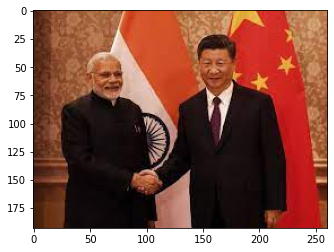

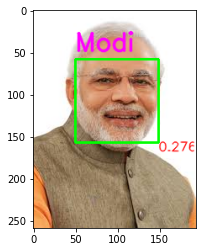

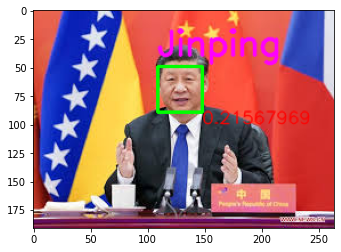

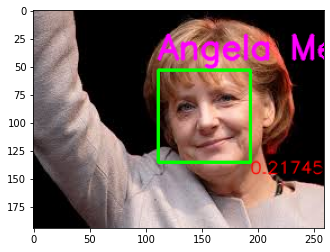

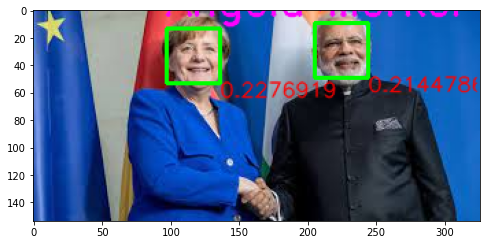

In [65]:
for img_name in os.listdir('Test_Images/'):
  if img_name=='crop_img.jpg':
    continue
  # Load Image
  img=cv2.imread(path+'/Test_Images/'+img_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Detect Faces
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    # Extract Each Face
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
    width=right-left
    height=bottom-top
    img_crop=img[top:top+height,left:left+width]
    cv2.imwrite(path+'/Test_Images/crop_img.jpg',img_crop)
    
    # Get Embeddings
    crop_img=load_img(path+'/Test_Images/crop_img.jpg',target_size=(224,224))
    crop_img=img_to_array(crop_img)
    crop_img=np.expand_dims(crop_img,axis=0)
    crop_img=preprocess_input(crop_img)
    img_encode=vgg_face(crop_img)

    # Make Predictions
    embed=K.eval(img_encode)
    person=classifier_model.predict(embed)
    name=person_rep[np.argmax(person)]
    os.remove(path+'/Test_Images/crop_img.jpg')
    cv2.rectangle(img,(left,top),(right,bottom),(0,255,0), 2)
    img=cv2.putText(img,name,(left,top-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),2,cv2.LINE_AA)
    img=cv2.putText(img,str(np.max(person)),(right,bottom+10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
  # Save images with bounding box,name and accuracy 
  cv2.imwrite(path+'/Predictions/'+img_name+'.jpg',img)
  plot(img)